# Optimization

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

## Definition

> `If there occur some changes in nature, the amount of action necessary for this change must be as small as possible.` Maupertuis (sec XVIII)  

Optimization is the process of finding the best value from possible alternatives with regards to a certain criteria [Wikipedia](http://en.wikipedia.org/wiki/Mathematical_optimization).  
Usually, such best value is the value that maximizes or minimizes the criteria. In this context, to solve an optimization problem is to find the maximum or minimum of a function. To solve an optimization problem, we first have to model the problem and define the objective, the variables, and the constraints of the problem. In optimization, these terms are usually defined as:

1. Cost or objective function: a function describing what we want to optimize.  
2. Design variable(s): variables that will be manipulated to optimize the cost function.  
3. Constraint functions: constrain the solution to a set of possible values.

Read more about that in [Introduction to Optimization](http://neos-guide.org/content/optimization-introduction) from the  [NEOS Guide](http://neos-guide.org/).

## Maxima and minima

In mathematics, the maximum and minimum of a function are the largest and smallest values that the function takes at a point either within a neighborhood (local) or on the function entire domain  (global) ([Wikipedia](http://en.wikipedia.org/wiki/Maxima_and_minima)). For a function of one variable, if the maximum or minimum of a function is not at the limits of the domain and if at least the first and second derivatives of the function exist, a maximum and minimum can be found as the point where the first derivative of the function is zero. If the second derivative on that point is positive, then it's a minimum, if it is negative, it's a maximum.

<div class='center-align'><figure><img src='./../images/maxmin.png' width=300 alt='minima and maxima of a function'/> <figcaption><center><i>Figure. Maxima and minima of a function of one variable.</i></center></figcaption> </figure></div>

### Maximum range of projectile motion

What is the optimal angle to throw a projectile to achieve the greatest distance?

The equations of motion for a projectile launched with an angle $\theta$ with the horizontal (consider constant gravitational acceleration, $g$) and neglecting the air resistance are:

$$ \begin{array}{l l}
x(t) = x_0 + v_0\cos(\theta)\:t \\
y(t) = y_0 + v_0\sin(\theta)\:t - \frac{g\:t^2}{2} \\
\\
v_x(t) = v_0\cos(\theta) \\
v_y(t) = v_0\sin(\theta) - g\:t \\
\\
a_x(t) = 0 \\
a_y(t) = -g
\end{array} $$

**Time of flight**   
The time of flight can be calculated from the equation for the vertical velocity and using the properties that at the maximum height, the vertical velocity is zero and the time of rising is equal to the time of falling:

$$ t_{flight} = \frac{2v_0\sin(\theta)}{g} $$

**Range**   
The range, $R$, is the horizontal distance reached by the projectile with respect to the point of release:

$$ \begin{array}{l l}
R = v_0\cos(\theta)\:t_{flight} \\
\\
R = \frac{v_0^2\sin(2\theta)}{g}
\end{array} $$

The maximum range is obtained by finding the angle that maximizes the equation above. In the context of optimization, the equation for $R$ is the cost function, $\theta$ is the design variable, and the  constraint is that feasible angles are in the interval $[0,\: 90^o]$.  
The solution of this problem is trivial, we know by inspection that the maximum range is given when $\sin(2\theta)$ is maximum, and for that, $\theta=45^o$. But let's show the solution with the  approach using derivatives:

$$ \frac{\mathrm{d} R}{\mathrm{d} \theta} = \frac{2v_0^2\cos(2\theta)}{g} $$

Find the value of $\theta$ where this derivative is zero:

$$ \frac{2v_0^2\cos(2\theta)}{g} = 0 \quad \Rightarrow \quad \theta=45^o $$

We can check this value corresponds to a maximum if the second derivative of $R$ at this value is negative:

$$ \frac{\mathrm{d}^2 R}{\mathrm{d} \theta^2} = -\frac{4v_0^2\sin(2\theta)}{g} $$

Which indeed is negative at $\theta=45^o$.

We can use Sympy to solve the steps of this problem. Let's import the necessary Python libraries and customize the environment for that:

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['lines.markersize'] = 5
matplotlib.rc('axes', grid=False, labelsize=14, titlesize=16, ymargin=0.05)
matplotlib.rc('legend', numpoints=1, fontsize=11)

import sympy as sym
from sympy.plotting import plot
#from sympy.interactive import printing
#printing.init_printing()
from IPython.display import display
from IPython.core.display import Math

Let's create symbolic variables, define the equation, differentiate it, and find the maximum value:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

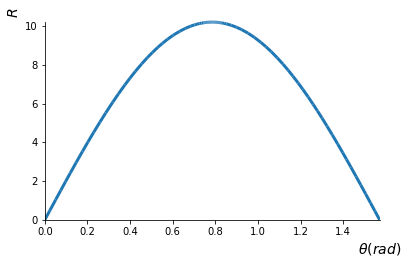

In [2]:
v0, g, theta = sym.symbols('v0 g theta')
R = v0**2*sym.sin(2*theta)/g
Rdiff = sym.diff(R, theta)
display(Math(sym.latex('R =') + sym.latex(R)))
display(Math(sym.latex(r'\frac{\mathrm{d}R}{\mathrm{d}\theta} =') + sym.latex(Rdiff)))
ang = sym.solve(Rdiff, theta)
display(Math(sym.latex('Sols:') + sym.latex(ang)))
display(Math(sym.latex(r'R(\theta=\pi/4)=') +
             sym.latex(sym.N(R.subs({v0: 10, g: 9.8, theta: sym.pi/4}), 4))))
plot(R.subs({v0: 10, g: 9.8}), (theta, 0, sym.pi/2),
     xlabel=r'$\theta(rad)$', ylabel=r'$R$');

### Maximum volume of a box

We want to make a box from a square cardboard with side $a$ such that its volume should be maximum. What is the optimal distance where the square cardbox should be cut and folded to make a box with maximum volume?

<div class='center-align'><figure><img src='./../images/box.png' width=400 alt='box optimization'/> <figcaption><center><i>Figure. A box to be made from a cardboard such that its volume should be maximum. Where we should cut?</i></center></figcaption> </figure></div>

If the distance where to cut and fold the cardbox is $b$, see figure above, the volume of the box will be:

$$ \begin{array}{l l}
V(b) = b(a-2b)(a-2b) \\
\\
V(b) = a^2b - 4ab^2 + 4b^3
\end{array} $$

The expression for $V$ is the cost function, $b$ is the design variable, and the constraint is that feasible values of $b$ are in the interval $[0, a/2]$.  
The first derivative of $V$ is:

$$ \frac{\mathrm{d}V}{\mathrm{d}b} = a^2 - 8ab + 12b^2  $$

We have to find the values for $b$ where this derivative is zero. Let's use Sympy for that:

In [3]:
a, b = sym.symbols('a b')
V = b*(a - 2*b)*(a - 2*b)
Vdiff = sym.expand(sym.diff(V, b))
roots = sym.solve(Vdiff, b)
display(Math(sym.latex('V =') + sym.latex(V)))
display(Math(sym.latex('\\frac{\mathrm{d}V}{\mathrm{d}b} =') + sym.latex(Vdiff)))
display(Math(sym.latex('Roots:') + sym.latex(roots)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Discarding the solution $b=a/2$ (where $V=0$), $b=a/6$ results in the maximum volume. We can check that by ploting the volume of the cardbox for $a=1$ and $b: [0,\:0.5]$:

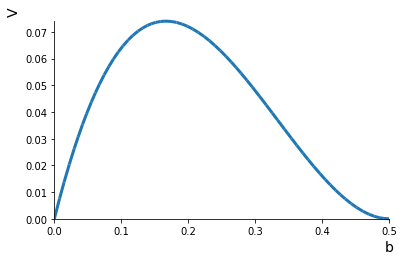

<IPython.core.display.Math object>

In [4]:
plot(V.subs({a: 1}), (b, 0, .5), xlabel='b', ylabel='V')
display(Math(sym.latex('V_{a=1}^{max} =') +
             sym.latex(sym.N(V.subs({b: a/6}).subs({a: 1}), 2))))

The examples above are trivial problems of optimization; there was only one design variable in each case and the cost functions, although nonlinear, were simple. When there is more than one design variable (the cost function depends on more than one variable), the general idea of finding minimum and maximum values where the derivatives are zero still holds, but the problem gets more complicated. For an introduction on that, particularly applied to biomechanics, see chapter 4 (start on page 609) of Nigg and Herzog (2006).

Let's see now a classical problem in biomechanics where optimization is useful and there is more than one design variable.

## The distribution problem in biomechanics

Using the inverse dynamics approach in biomechanics, we can determine the net force and torque acting on a joint if we know the external forces on the segments and the kinematics and inertial properties of the segments. But with this approach we are unable to determine the individual muscles forces that  created such torque, as expressed in the following equation:

$$ M_{total} = M_1 + M_2 + \dots + M_n = r_1F_1 + r_2F_2 + \dots + r_nF_n $$

where $r_i$ is the moment arm of the force $F_i$ that generates a torque $M_i$, a parcel of the (known) total torque $M_{total}$.  

Even if we know the moment arm of each muscle (e.g., from cadaveric data or from image analysis), the equation above has $n$ unknowns. Because there is more than one muscle that potentially created such torque, there are more unknowns than equations, and the problem is undetermined. So, the problem is how to find how the torque is distributed among the muscles of that joint.

One solution is to consider that we (biological systems) optimize our effort in order to minimize energy expenditure, stresses on our tissues, fatigue, etc. The principle of least action, stated in the opening of this text, is an allusion that optimization might be ubiquitous in nature. With this rationale, let's solve the distribution problem in biomechanics using optimization and find the minimum force of each muscle necessary to complete a given task.

The following cost functions have been proposed to solve the distribution problem in biomechanics:

$$ \begin{array}{l l}
\sum_{i=1}^N F_i \quad &\text{(e.g., Seireg and Arkivar, 1973)}
\\
\sum_{i=1}^N F_i^2 \quad &
\\
\sum_{i=1}^N \left(\frac{F_i}{pcsa_i}\right)^2 \quad &\text{(e.g., Crowninshield and Brand, 1981)}
\\
\sum_{i=1}^N \left(\frac{F_i}{M_{max,i}}\right)^3 \quad &\text{(e.g., Herzog, 1987)}
\end{array} $$

Where $pcsa_i$ is the physiological cross-sectional area of muscle $i$ and $M_{max,i}$ is the maximum torque muscle $i$ can produce.  
Each muscle force $F_i$ is a design variable and the following constraints must be satisfied:

$$ \begin{array}{l l}
0 \leq F_i \leq F_{max}
\\
\sum_{i=1}^N r_i \times F_i = M
\end{array} $$

Let's apply this concept to solve a distribution problem in biomechanics.

### Muscle force estimation

Consider the following main flexors of the elbow joint (see figure below): biceps long head, biceps short head, and brachialis. Suppose that the elbow net joint torque determined using inverse dynamics is 20 Nm (flexor). How much each of these muscles contributed to the net torque?

<div class='center-align'><figure><img src='./../images/elbowflexors.png' alt='Elbow flexors'/> <figcaption><center><i>Figure. A view in OpenSim of the arm26 model showing three elbow flexors (Biceps long and short heads and Brachialis).</i></center></figcaption> </figure></div>

For the optimization, we will need experimental data for the moment arm, maximum moment, and pcsa of each muscle. Let's import these data from the OpenSim arm26 model:

In [5]:
# time elbow_flexion BIClong BICshort BRA
r_ef = np.loadtxt('./../data/r_elbowflexors.mot', skiprows=7)
f_ef = np.loadtxt('./../data/f_elbowflexors.mot', skiprows=7)

The maximum isometric force of these muscles are defined in the arm26 model as: Biceps long head: 624.3 N, Biceps short head: 435.56 N, and Brachialis: 987.26 N. Let's compute the mamimum torques that each muscle could produce considering a static situation at the different elbow flexion angles:

In [6]:
m_ef = r_ef*1
m_ef[:, 2:] = r_ef[:, 2:]*f_ef[:, 2:]

And let's visualize these data:

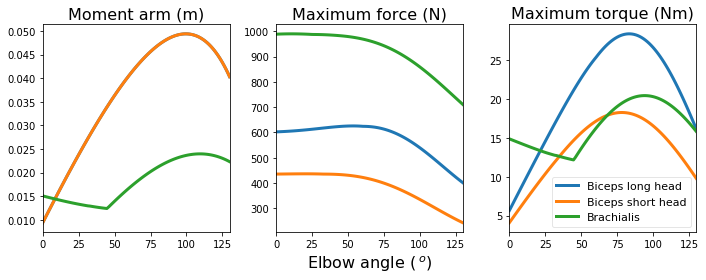

In [7]:
labels = ['Biceps long head', 'Biceps short head', 'Brachialis']
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(10, 4))
ax[0].plot(r_ef[:, 1], r_ef[:, 2:])
#ax[0].set_xlabel('Elbow angle $(\,^o)$')
ax[0].set_title('Moment arm (m)')
ax[1].plot(f_ef[:, 1], f_ef[:, 2:])
ax[1].set_xlabel('Elbow angle $(\,^o)$', fontsize=16)
ax[1].set_title('Maximum force (N)')
ax[2].plot(m_ef[:, 1], m_ef[:, 2:])
#ax[2].set_xlabel('Elbow angle $(\,^o)$')
ax[2].set_title('Maximum torque (Nm)')
ax[2].legend(labels, loc='best', framealpha=.5)
ax[2].set_xlim(np.min(r_ef[:, 1]), np.max(r_ef[:, 1]))
plt.tight_layout()
plt.show()

These data don't have the pcsa value of each muscle. We will estimate the pcsa considering that the amount of maximum muscle force generated per area is constant and equal to $50N/cm^2$. Consequently, the pcsa (in $cm^2$) for each muscle is:

In [8]:
a_ef = np.array([624.3, 435.56, 987.26])/50  # 50 N/cm2

### Static versus dynamic optimization

We can solve the distribution problem separately for each angle (instant) of the elbow; we will refer to that as static optimization. However, there is no guarantee that when we analyze all these solutions across the range of angles, they will be the best solution overall. One reason is that static optimization ignores the time history of the muscle force. Dynamic optimization refers to the optimization over a period of time. For such, we will need to input a cost function spanning the entire period of time at once. Dynamic optimization usually has a higher computational cost than static optimization.

For now, we will solve the present problem using static optimization.

### Solution of the optimization problem

For the present case, we are dealing with a problem of minimization, multidimensional (function of several variables), nonlinear, constrained, and we can't assume that the cost function is convex. Numerical optimization is hardly a simple task. There are many different algorithms and public and commercial software for performing optimization. For instance, look at [NEOS Server](http://www.neos-server.org/neos/), a free internet-based service for solving numerical optimization problems.  
We will solve the present problem using the [scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) package which provides several optimization algorithms. We will use the function `minimize`:

```python
scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
"""Minimization of scalar function of one or more variables."""
```

Now, let's write Python functions for each cost function:

In [9]:
from scipy.optimize import minimize

In [10]:
def cf_f1(x):
    """Cost function: sum of forces."""  
    return x[0] + x[1] + x[2]

def cf_f2(x):
    """Cost function: sum of forces squared."""
    return x[0]**2 + x[1]**2 + x[2]**2

def cf_fpcsa2(x, a):
    """Cost function: sum of squared muscle stresses."""
    return (x[0]/a[0])**2 + (x[1]/a[1])**2 + (x[2]/a[2])**2

def cf_fmmax3(x, m):
    """Cost function: sum of cubic forces normalized by moments."""
    return (x[0]/m[0])**3 + (x[1]/m[1])**3 + (x[2]/m[2])**3

Let's also define the Jacobian for each cost function (which is an optional parameter for the optimization):

In [11]:
def cf_f1d(x):
    """Derivative of cost function: sum of forces."""
    dfdx0 = 1
    dfdx1 = 1
    dfdx2 = 1
    return np.array([dfdx0, dfdx1, dfdx2])

def cf_f2d(x):
    """Derivative of cost function: sum of forces squared."""
    dfdx0 = 2*x[0]
    dfdx1 = 2*x[1]
    dfdx2 = 2*x[2]
    return np.array([dfdx0, dfdx1, dfdx2])

def cf_fpcsa2d(x, a):
    """Derivative of cost function: sum of squared muscle stresses."""
    dfdx0 = 2*x[0]/a[0]**2
    dfdx1 = 2*x[1]/a[1]**2
    dfdx2 = 2*x[2]/a[2]**2
    return np.array([dfdx0, dfdx1, dfdx2])

def cf_fmmax3d(x, m):
    """Derivative of cost function: sum of cubic forces normalized by moments."""
    dfdx0 = 3*x[0]**2/m[0]**3
    dfdx1 = 3*x[1]**2/m[1]**3
    dfdx2 = 3*x[2]**2/m[2]**3
    return np.array([dfdx0, dfdx1, dfdx2])

Let's define initial values:

In [12]:
M = 20  # desired torque at the elbow
iang = 69  # which will give the closest value to 90 degrees
r  = r_ef[iang, 2:]
f0 = f_ef[iang, 2:]
a  = a_ef
m  = m_ef[iang, 2:]
x0 = f_ef[iang, 2:]/10  # far from the correct answer for the sum of torques
print('M =', M)
print('x0 =', x0)
print('r * x0 =', np.sum(r*x0))

M = 20
x0 = [ 57.51311369  36.29974032  89.6470056 ]
r * x0 = 6.62200444607


Inequality constraints (such as boundaries in our problem) can be entered with the parameter `bounds` to the `minimize` function:

In [13]:
bnds = ((0, f0[0]), (0, f0[1]), (0, f0[2]))

Equality constraints (such as the sum of torques should equals the desired torque in our problem), as well as inequality constraints, can be entered with the parameter `constraints` to the `minimize` function (and we can also opt to enter the Jacobian of these constraints):

In [14]:
# use this in combination with the parameter bounds:
cons = ({'type': 'eq',
         'fun' : lambda x, r, f0, M: np.array([r[0]*x[0] + r[1]*x[1] + r[2]*x[2] - M]), 
         'jac' : lambda x, r, f0, M: np.array([r[0], r[1], r[2]]), 'args': (r, f0, M)})

In [15]:
# to enter everything as constraints:
cons = ({'type': 'eq',
         'fun' : lambda x, r, f0, M: np.array([r[0]*x[0] + r[1]*x[1] + r[2]*x[2] - M]), 
         'jac' : lambda x, r, f0, M: np.array([r[0], r[1], r[2]]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: f0[0]-x[0],
         'jac' : lambda x, r, f0, M: np.array([-1, 0, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: f0[1]-x[1],
         'jac' : lambda x, r, f0, M: np.array([0, -1, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: f0[2]-x[2],
         'jac' : lambda x, r, f0, M: np.array([0, 0, -1]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: x[0],
         'jac' : lambda x, r, f0, M: np.array([1, 0, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: x[1],
         'jac' : lambda x, r, f0, M: np.array([0, 1, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: x[2],
         'jac' : lambda x, r, f0, M: np.array([0, 0, 1]), 'args': (r, f0, M)})

Although more verbose, if all the Jacobians of the constraints are also informed, this alternative seems better than informing bounds for the optimization process (less error in the final result and less iterations).  

Given the characteristics of the problem, if we use the function `minimize` we are limited to the SLSQP (Sequential Least SQuares Programming) solver.  

Finally, let's run the optimization for the four different cost functions and find the optimal muscle forces:

In [16]:
f1r = minimize(fun=cf_f1, x0=x0, args=(), jac=cf_f1d,
               constraints=cons, method='SLSQP',
               options={'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 409.59266009953336
            Iterations: 7
            Function evaluations: 7
            Gradient evaluations: 7


In [17]:
f2r = minimize(fun=cf_f2, x0=x0, args=(), jac=cf_f2d,
               constraints=cons, method='SLSQP',
               options={'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 75657.38479127169
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5


In [18]:
fpcsa2r = minimize(fun=cf_fpcsa2, x0=x0, args=(a,), jac=cf_fpcsa2d,
                   constraints=cons, method='SLSQP',
                   options={'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 529.9639777695737
            Iterations: 11
            Function evaluations: 11
            Gradient evaluations: 11


In [19]:
fmmax3r = minimize(fun=cf_fmmax3, x0=x0, args=(m,), jac=cf_fmmax3d,
                   constraints=cons, method='SLSQP',
                   options={'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1075.1388931664733
            Iterations: 12
            Function evaluations: 12
            Gradient evaluations: 12


Let's compare the results for the different cost functions:

In [20]:
dat = np.vstack((np.around(r*100,1), np.around(a,1), np.around(f0,0), np.around(m,1)))
opt = np.around(np.vstack((f1r.x, f2r.x, fpcsa2r.x, fmmax3r.x)),1)
er = ['-', '-', '-', '-',
      np.sum(r*f1r.x)-M, np.sum(r*f2r.x)-M, np.sum(r*fpcsa2r.x)-M, np.sum(r*fmmax3r.x)-M]
data = np.vstack((np.vstack((dat, opt)).T, er)).T

from pandas import DataFrame
rows = ['$\text{Moment arm}\;[cm]$', '$pcsa\;[cm^2]$', '$F_{max}\;[N]$', '$M_{max}\;[Nm]$',
        '$\sum F_i$', '$\sum F_i^2$', '$\sum(F_i/pcsa_i)^2$', '$\sum(F_i/M_{max,i})^3$']
cols = ['Biceps long head', 'Biceps short head', 'Brachialis', 'Error in M']
df = DataFrame(data, index=rows, columns=cols)
print('\nComparison of different cost functions for solving the distribution problem')
df


Comparison of different cost functions for solving the distribution problem


,Biceps long head,Biceps short head,Brachialis,Error in M
$\text{Moment arm}\;[cm]$,4.9,4.9,2.3,-
$pcsa\;[cm^2]$,12.5,8.7,19.7,-
$F_{max}\;[N]$,575.0,363.0,896.0,-
$M_{max}\;[Nm]$,28.1,17.7,20.4,-
$\sum F_i$,215.4,194.2,0.0,0.0
$\sum F_i^2$,184.7,184.7,86.1,0.0
$\sum(F_i/pcsa_i)^2$,201.7,98.2,235.2,0.0
"$\sum(F_i/M_{max,i})^3$",241.1,120.9,102.0,-3.5527136788e-15


## Comments

The results show that the estimations for the muscle forces depend on the cost function used in the optimization. Which one is correct? This is a difficult question and it's dependent on the goal of the actual task being modeled. Glitsch and Baumann (1997) investigated the effect of different cost functions on the optimization of walking and running and the predicted muscles forces were compared with the electromyographic activity of the corresponding muscles of the lower limb. They found that, among the analyzed cost functions, the minimization of the sum of squared muscle stresses resulted in the best similarity with the actual electromyographic activity.

In general, one should always test different algorithms and different initial values before settling for the solution found. Downey (2011), Kitchin (2013), and Kiusalaas (2013) present more examples on numerical optimization. The [NEOS Guide](http://neos-guide.org/) is a valuable source of information on this topic and [OpenOpt](http://openopt.org/) is a good alternative software for numerical optimization in Python.

## Exercises

1. Regarding the distribution problem for the elbow muscles presented in this text:  
    a. Test different initial values for the optimization.  
    b. Test other values for the elbow angle where the results are likely to change.   
    
2. In an experiment to estimate forces of the elbow flexors, through inverse dynamics it was found an elbow flexor moment of 10 Nm. Consider the following data for maximum force (F0), moment arm (r), and pcsa (A) of the brachialis, brachioradialis, and biceps brachii muscles: F0 (N): 1000, 250, 700; r (cm): 2, 5, 4; A (cm$^2$): 33, 8, 23, respectively (data from Robertson et al. (2013)).  
    a. Use static optimization to estimate the muscle forces.  
    b. Test the robustness of the results using different initial values for the muscle forces.  
    c. Compare the results for different cost functions.

## References

- Crowninshield RD, Brand RA (1981) [A physiologically based criterion of muscle force prediction in locomotion](http://www.ncbi.nlm.nih.gov/pubmed/7334039). Journal of Biomechanics, 14, 793–801.  
- Downey AB (2011) [Physical Modeling in MATLAB](http://greenteapress.com/matlab/). Green Tea Press.  
- Herzog W (1987) [Individual muscle force estimations using a non-linear optimal design](http://www.ncbi.nlm.nih.gov/pubmed/3682873). J Neurosci Methods, 21, 167-179.  
- Glitsch U, Baumann W (1997) [The three-dimensional determination of internal loads in the lower extremity](http://www.ncbi.nlm.nih.gov/pubmed/9456380). Journal of Biomechanics, 30, 1123–1131.  
- Kitchin J (2013) [pycse - Python Computations in Science and Engineering](http://kitchingroup.cheme.cmu.edu/pycse/).  
- Kiusalaas (2013) [Numerical methods in engineering with Python 3](http://books.google.com.br/books?id=aJkXoxxoCoUC). 3rd edition. Cambridge University Press.  
- Nigg BM and Herzog W (2006) [Biomechanics of the Musculo-skeletal System](https://books.google.com.br/books?id=hOIeAQAAIAAJ&dq=editions:ISBN0470017678). 3rd Edition. Wiley.  
- Robertson G, Caldwell G, Hamill J, Kamen G (2013) [Research Methods in Biomechanics](http://books.google.com.br/books?id=gRn8AAAAQBAJ). 2nd Edition. Human Kinetics.  
- Seireg A, Arvikar RJ (1973) [A mathematical model for evaluation of forces in lower extremeties of the musculo-skeletal system](http://www.ncbi.nlm.nih.gov/pubmed/4706941). Journal of Biomechanics, 6,  313–322, IN19–IN20, 323–326.